<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/03_Neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow**

| Hyperparameter | Binary Classification | Multiclass Classification |
| :------------- | :-------------------- | :------------------------ |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum=unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, genrally 10 to 100 | Same as binary classification |
| Output layer shape | 1(one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually `ReLU`(rectified linear unit) | Same as binary classification |
| Ouput activation | `Sigmoid` | `Softmax` |
| Loss function | `Cross entropy`(`tf.keras.losses.BinaryCrossentropy` in Tensorflow) |`Cross entropy`(`tf.keras.losses.CategoricalCrossentropy` in Tensorflow) |
| Optimizer | `SGD`(stochastic gradient descent), `Adam` | Same as binary classification |

# **Introduction to Neural networks classification with Tensorflow**

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classfication
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
import tensorflow as tf
print("Tensorflow version we're using: ", tf.__version__)

Tensorflow version we're using:  2.18.0


In [2]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

 Our data is a little hard to understand right now... let's visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


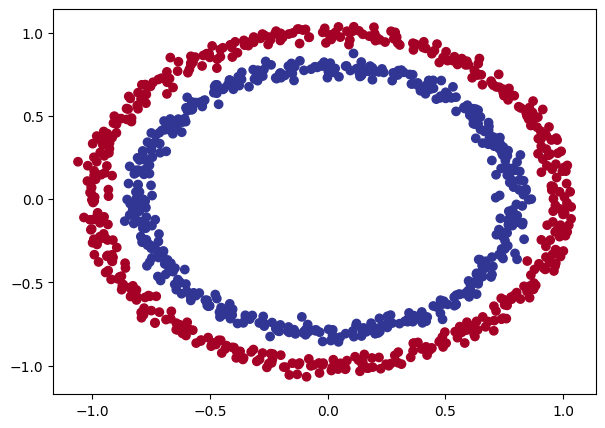

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77858&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model

In [10]:
# Building a neural network model for classification
tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model using Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4716 - loss: 6.6318
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4442 - loss: 6.2722
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4487 - loss: 4.9413
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4510 - loss: 4.2016
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4631 - loss: 1.2335


## Improving model

1.  `Create a model` - we might to add more layers or increase the number of hidden units within a layer.
2. `Compiling a model` - here we might choose a different optimization function such as **Adam** instead of **SGD()**.
3. `Fitting a model` - we can leave our model for a longer training period time.

In [11]:
# Let's try and imporve our model by training fro longer,
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step thimngs up a notch and add an extra layer.

> ## `Build model_1`

In [12]:
tf.random.set_seed(42)

# 1. create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4966 - loss: 0.6923  


[0.6934113502502441, 0.4779999852180481]

> ## ` Build model_2`

In [14]:
# Build model_2

tf.random.set_seed(42)  # random seed for reproducability

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # changing optimizer to Adam
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012


[0.0011720150941982865, 1.0]

To visualize our model's prediction let's create a function. `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions accross meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0])>1:
    print("This is a multicalss classification....")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("This is a Binary classification....")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


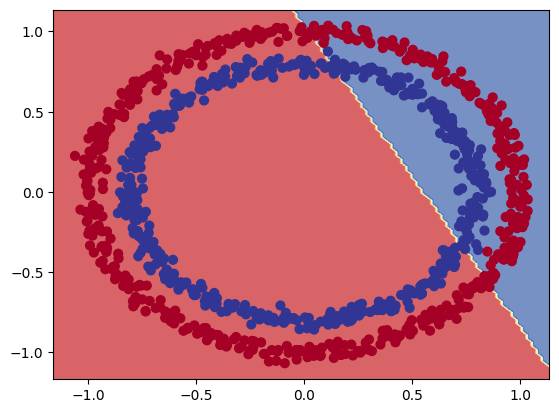

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

In [18]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Creating regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y= X + 100

# Splitting into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_2.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Encountered an error , which is pretty obvious.

**Reason** -> We compiled our `model_2` on the classification fundamentals and packages, such as BinaryCrossentropy, accuracy..

> Let's change our model to suit our regression problem

In [19]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(10, activation="relu"), # adding layer with activation function
    tf.keras.layers.Dense(1)
])

# 2. Compile the model ( here comes the change for regression problem)
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 484.7953 - mae: 484.7953
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 461.6112 - mae: 461.6112 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 439.5376 - mae: 439.5376 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 427.7373 - mae: 427.7373 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 417.3001 - mae: 417.3001 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 405.0946 - mae: 405.0946  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 391.5977 - mae: 391.5977 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 376.8070 - mae: 376.8070 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 360.6212 - mae: 360.6212 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 342.8990 - mae: 342.8990 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 323.4777 - mae: 323.4777 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 302.1801 - mae: 302.1801 
E

In [20]:
model_2.evaluate(X_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 59.2691 - mae: 59.2691 


[62.0019645690918, 62.0019645690918]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


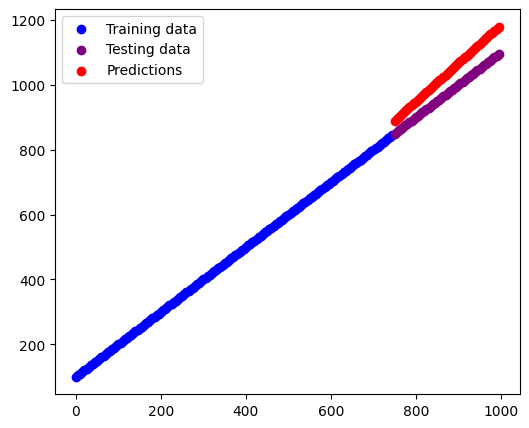

In [21]:
# Making predictions
y_reg_pred = model_2.predict(X_reg_test)
plt.figure(figsize=(6,5))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="purple", label="Testing data")
plt.scatter(X_reg_test, y_reg_pred, c="red", label="Predictions")
plt.legend()

## The missing piece : Non-linearity

In [22]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

# 2. Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4859 - loss: 6.7489
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7357 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7339 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7323 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7314 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7305
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7296
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 6.7289
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7281
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 6.7274
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 6.7267
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

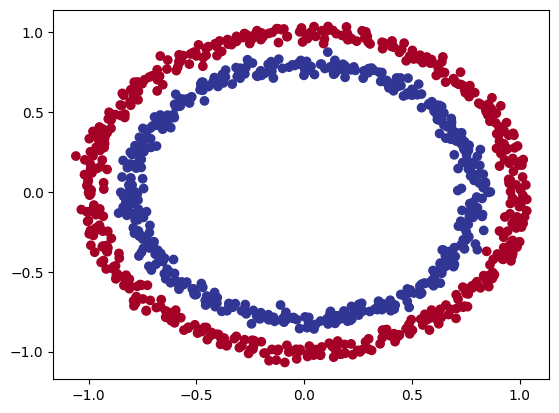

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


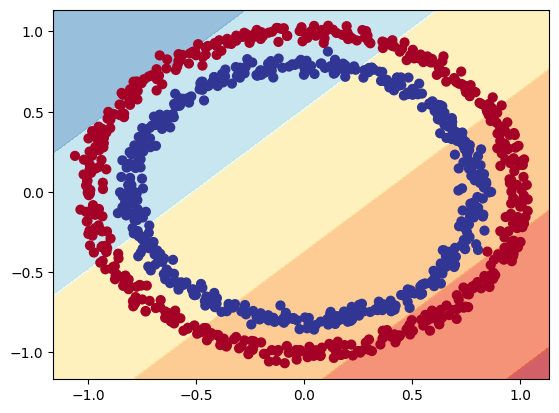

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [25]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
])

# 2. Compile a model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5096 - loss: 5.7676
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 5.7618 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 5.7490 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 5.7205
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5049 - loss: 5.6912
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.6622
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 5.6256
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4970 - loss: 5.6207
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 5.6192
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 5.5854
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4981 - loss: 5.5504 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


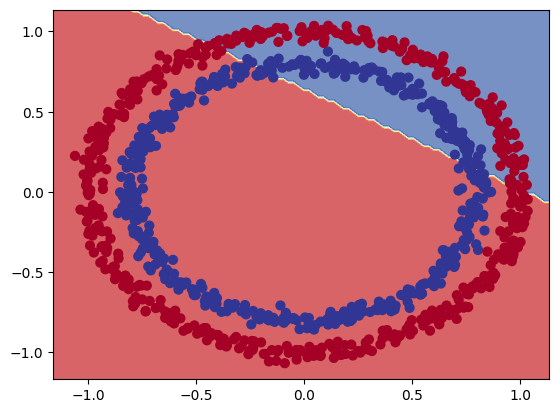

In [26]:
plot_decision_boundary(model = model,
                       X=X,
                       y=y)

In [27]:
# Time to replicate the multi-layer neural network playground from Tensorflow playground

tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3623 - loss: 0.8473
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2991 - loss: 0.8215
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3024 - loss: 0.8082
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 0.7993
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2793 - loss: 0.7924
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2615 - loss: 0.7866
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 0.7815
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2262 - loss: 0.7770
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2070 - loss: 0.7730
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1896 - loss: 0.7694
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1707 - loss: 0.7661
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [28]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5236 - loss: 0.6806  


[0.6696680188179016, 0.5590000152587891]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
This is a Binary classification....


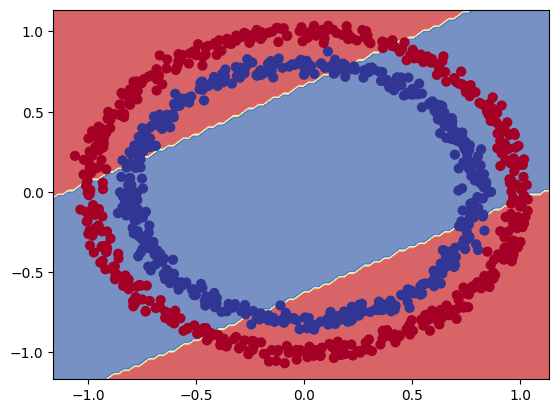

In [29]:
# How do our model predictions look
plot_decision_boundary(model_5, X, y)

Let's again try one more time to fit this yellow circle line in between the data points

In [30]:
# Setting random seed
tf.random.set_seed(42) # for reproducability

# 1. Create a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),  # changing activation for output layer
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5123 - loss: 0.6930
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 0.6920
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 0.6915
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.6912
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5104 - loss: 0.6909
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6906
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4972 - loss: 0.6903
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4940 - loss: 0.6900
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5102 - loss: 0.6896
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5088 - loss: 0.6892
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5170 - loss: 0.6889
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

Woah Woah Woah!!!
we got accuracy of more than 90% , crazily awesome.

In [31]:
# Let's evaluate the model
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.3335


[0.3287493586540222, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


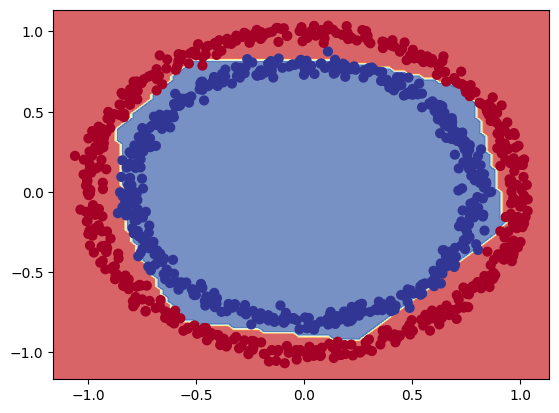

In [32]:
# Let's visualize the predictions
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

**`Note`** - The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [33]:
# Create a tensor (similar to the data we passs into our models)
tensor = tf.cast(tf.range(-10, 10), dtype=tf.float32)
tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

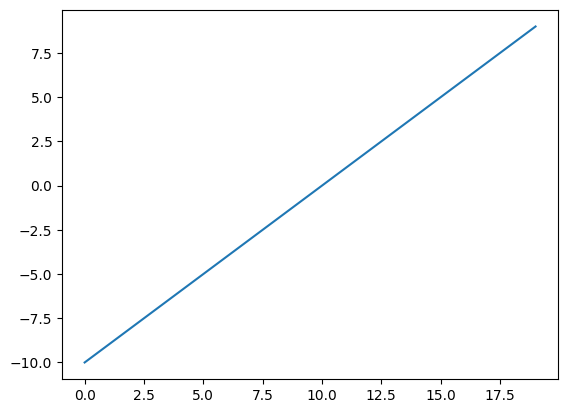

In [34]:
# Visualize our tensor
plt.plot(tensor)

In [35]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using signoid function on tensor
sigmoid(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

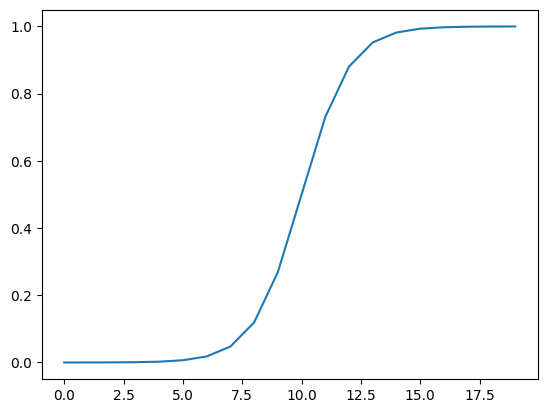

In [36]:
# Plotting sigmoid tensor
plt.plot(sigmoid(tensor))

In [37]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0, x)

# Using relu on tensor
relu(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

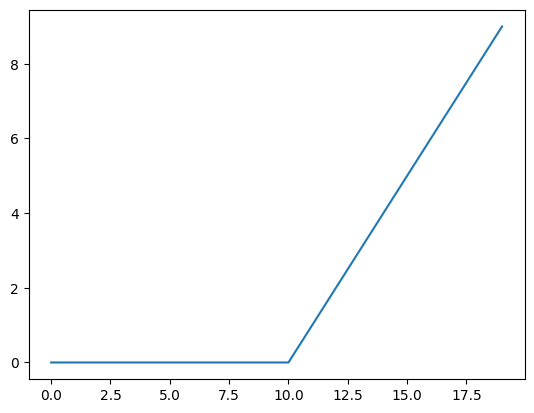

In [38]:
# Visualize tensors via relu
plt.plot(relu(tensor))

In [39]:
# Let's replicate the tanh activation function
def tanh(x):
  return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

# Using tanh into our tensor
tanh(tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

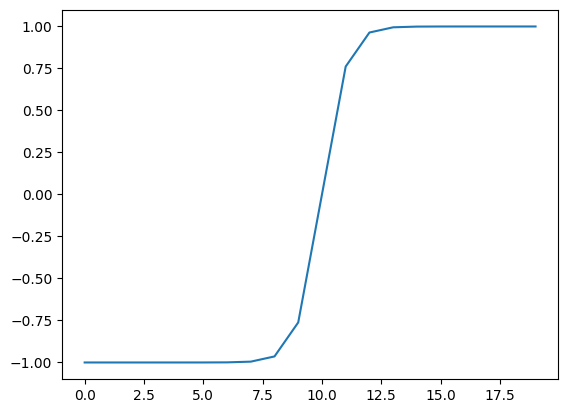

In [40]:
# Visualizing tensor
plt.plot(tanh(tensor))

## Evaluating and improving our classification model


So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [41]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [42]:
# Splitting data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on training data and evaluating on testing data
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the data
history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4997 - loss: 0.7054
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4991 - loss: 0.6900 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 0.6843
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 0.6782 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 0.6717 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 0.6639 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - loss: 0.6550 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5926 - loss: 0.6432 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6158 - loss: 0.6274 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6090 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.5858 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [45]:
# Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9910 - loss: 0.0376  


[0.050750669091939926, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
This is a Binary classification....


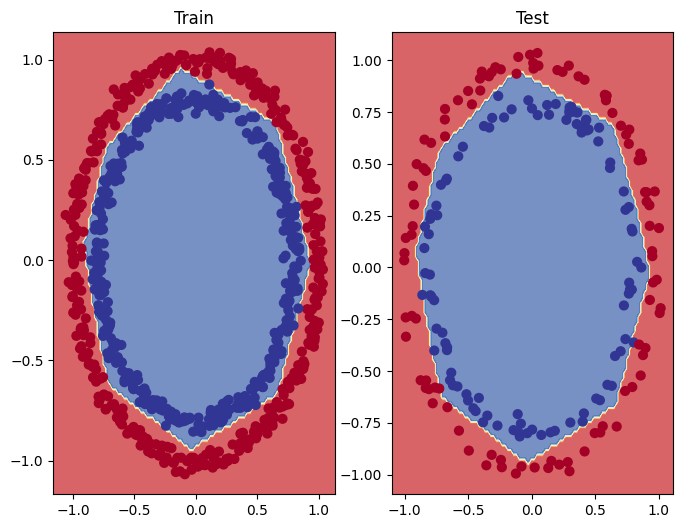

In [46]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X= X_test, y=y_test)
plt.show()

In [47]:
history.history

{'accuracy': [0.4962500035762787,
  0.5099999904632568,
  0.550000011920929,
  0.5575000047683716,
  0.5600000023841858,
  0.5912500023841858,
  0.6187499761581421,
  0.6512500047683716,
  0.668749988079071,
  0.7037500143051147,
  0.7362499833106995,
  0.7649999856948853,
  0.7762500047683716,
  0.7787500023841858,
  0.7987499833106995,
  0.800000011920929,
  0.8087499737739563,
  0.8149999976158142,
  0.8237500190734863,
  0.8299999833106995,
  0.8450000286102295,
  0.8500000238418579,
  0.8700000047683716,
  0.8774999976158142,
  0.8862500190734863,
  0.8987500071525574,
  0.9075000286102295,
  0.9524999856948853,
  0.9900000095367432,
  0.9925000071525574,
  0.9937499761581421,
  0.9950000047683716,
  0.9950000047683716,
  0.9962499737739563,
  0.9962499737739563,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9937499761581421,
  0.9937499761581421,
  0.9950000047683716,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
 

In [48]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.49625,0.698429
1,0.51000,0.689846
2,0.55000,0.684248
3,0.55750,0.678553
4,0.56000,0.671939
5,0.59125,0.663035
6,0.61875,0.652122
7,0.65125,0.638277
8,0.66875,0.621075
9,0.70375,0.600305


Text(0.5, 1.0, 'Model_7 loss curves')

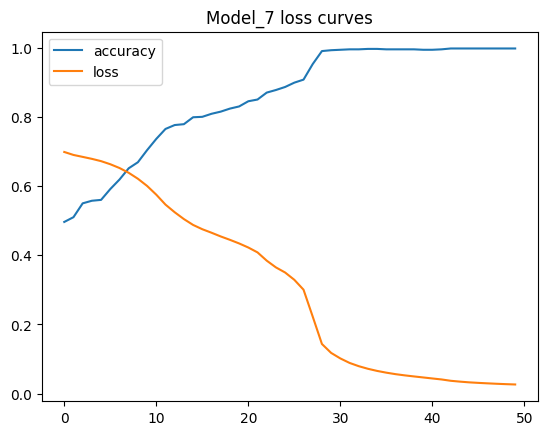

In [49]:
## Plot the loss (or training) curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

**NOTE:** For many problems, the loss funciton going down means the model is improving (the predictions it's making are getting closer to the ground turth labels).

## Finding the best learning rate


TO find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to yout *while* its training.
* Another model (we could use the same one as above).
* A modified loss curve plot.

In [50]:
# setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4987 - loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.6946 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4950 - loss: 0.6945 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4310 - loss: 0.6944 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.6944 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5244 - loss: 0.6943 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5188 - loss: 0.6942 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5162 - loss: 0.6942 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5011 - loss: 0.6941 - learning_

Text(0.5, 0, 'epochs')

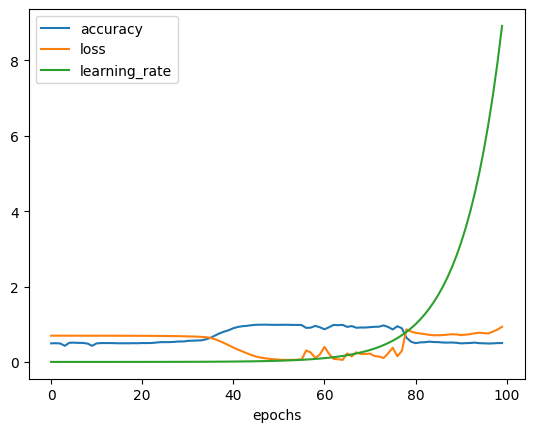

In [51]:
# Check out the histroy
pd.DataFrame(history_8.history).plot()
plt.xlabel("epochs")

Text(0.5, 1.0, 'Learning rate v/s Loss')

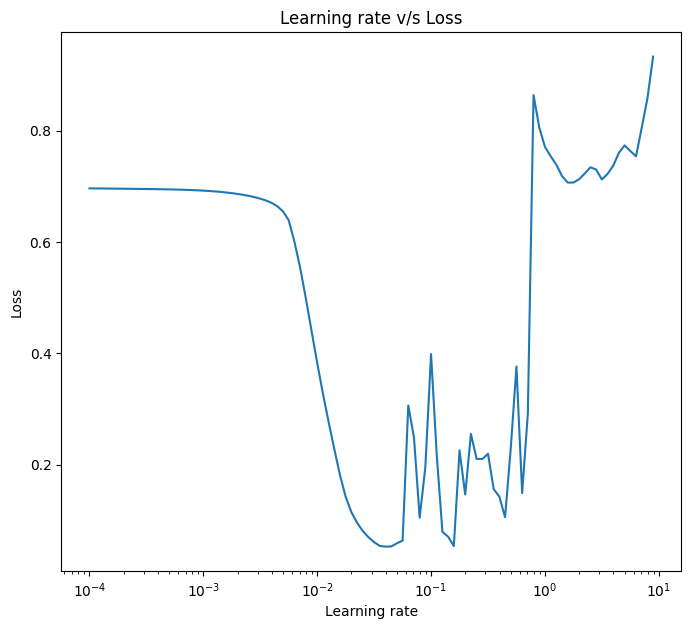

In [52]:
# Let's plot learning rate values versues the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(8,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s Loss")

In [53]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Let's try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=45)

Epoch 1/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5186 - loss: 0.6872
Epoch 2/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.6743 
Epoch 3/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6069 - loss: 0.6563 
Epoch 4/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6308 
Epoch 5/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.5811 
Epoch 6/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.5005 
Epoch 7/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.4304 
Epoch 8/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9485 - loss: 0.2856 
Epoch 9/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.1885 
Epoch 10/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.1370 
Epoch 11/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9863 - loss: 0.1060 
Epoch 12/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [55]:
model_9.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9918 - loss: 0.0251  


[0.034436844289302826, 0.9850000143051147]

In [56]:
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.0376 


[0.050750669091939926, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
This is a Binary classification....


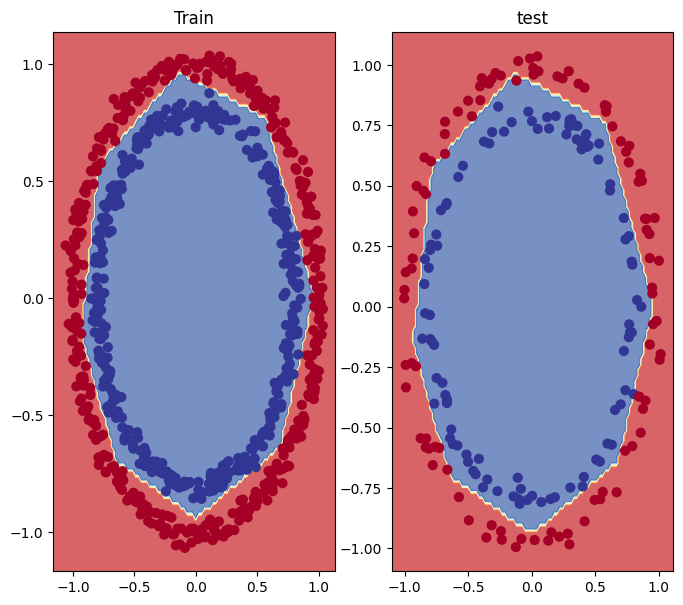

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(8,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

## Classification evaluation methods


| Metric Name | When to Use |
| :---------- | :---------- |
| `Accuracy` | Default metric for classification problems. Not the best for imbalanced classes. |
| `Precision` | Higher precision leads to less false positives. |
| `Recall` | Higher recall leads to less false negatives. |
| `F1-Score` | Combination of precision and recall, usually a good overall metric for a classification model. |
| `Confusion Matrix` | When comparing predicitons to labels to see where model gets confused. Can be hard to use with large number of classes. |




**Note:** There exists a tradeoff between precision and recall.


## More classification evaluation methods

Alongside visualizing our results as much possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [58]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss} ")
print(f"Model accuracy on the test set: {(accuracy*100): .2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9918 - loss: 0.0251 
Model loss on the test set: 0.034436844289302826 
Model accuracy on the test set:  98.50%


Let's build a confusion matrix...

In [59]:
# Building up a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_9.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
y_test[:5], y_pred[:5]

(array([1, 0, 1, 0, 1]),
 array([[0.99971986],
        [0.03048203],
        [0.99979794],
        [0.00321491],
        [0.7925416 ]], dtype=float32))

Oops... looks like our predictions array has come out in prediction probability form.. the standard output from the sigmoid (or softmax) activation functions.

In [61]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [62]:
# Now creating confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[98,  2],
       [ 1, 99]])

How about we prettify our confusion matrix?

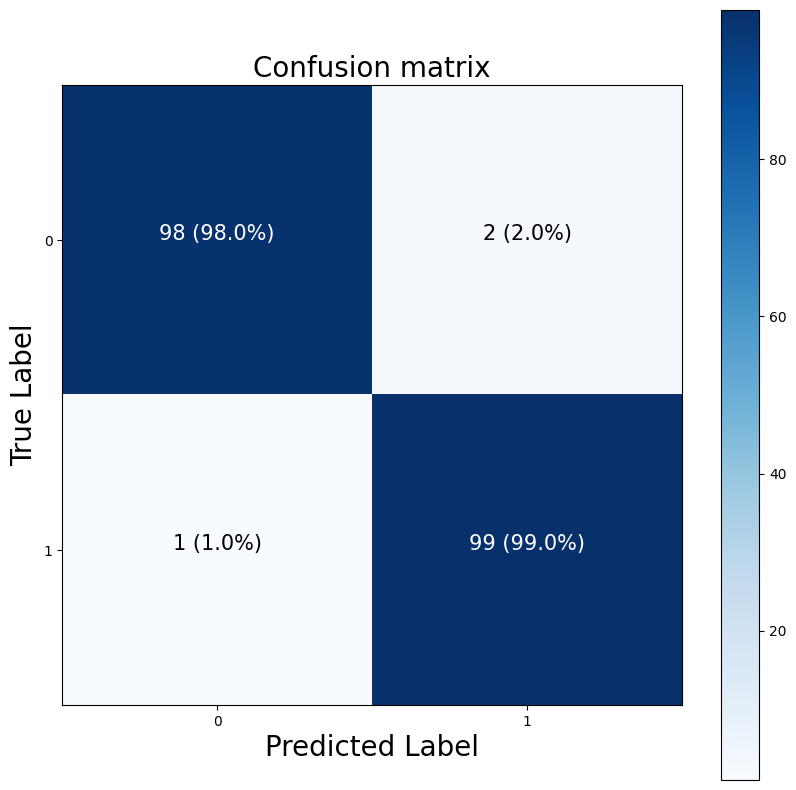

In [63]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if(classes):
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels= labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_normal[i,j]*100:.1f}%)" ,
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)


When you have more than two classes as asn option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's also multi-class classification.

> To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [65]:
# Show the first training example
print(f"Training sample:\n {train_data[0]} \n")
print(f"Training labale:\n {train_labels[0]} \n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [66]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

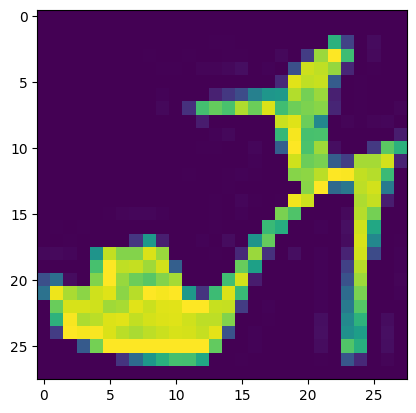

In [67]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [96]:
# Create a small list so we can index onto our training labels so thery are human-readable
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

we are dealing with 10 classes, so anything above 2 is said to be multiclass-classification

Text(0.5, 1.0, 'Pullover')

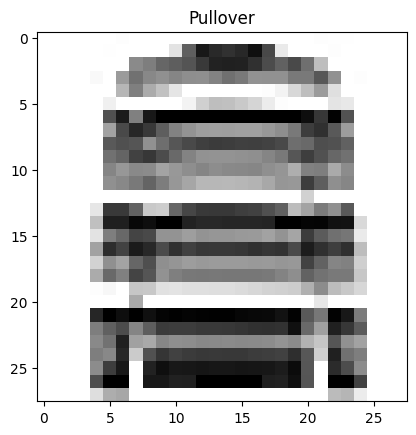

In [69]:
# Plot an example image and its label
index = 5214
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index]])

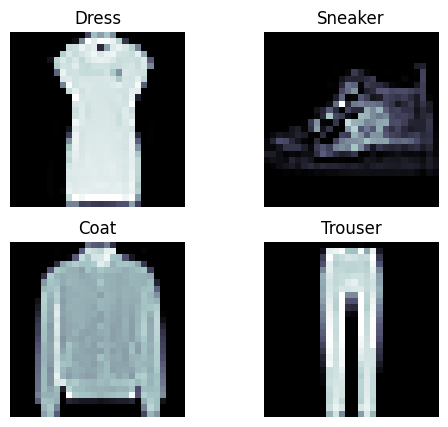

In [70]:
 # Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(6,5))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.bone)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a mulit-class classification model


For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28
* Ouput shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Ouput layer activation = Softmax(not sigmoid)

In [71]:
# our data needs to be flattened (from 28*28, to None,784/)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

flatten_model.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

`CategoricalCrossentropy() :` When our labels is one_hot_encoded.
`SparseCategoricalCrossentropy() :` When our labels is in integer.

* If your labels are *one-hot encoded* use CategoricalCrossentropy().
* If your labels are **not** *one hot encoded* use SparseCategoricalCrossentropy().

In [72]:
# Setting random seed
tf.random.set_seed(42)

# 1. Create a model
multiclass_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
multiclass_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                           metrics=["accuracy"])
# 3. Fit the data
non_norm_history = multiclass_model_1.fit(train_data,
                                          train_labels,
                                          epochs=10,
                                          validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1007 - loss: 2.5965 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1019 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1020 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1020 - loss: 2.3039 - 

In [73]:
# check the model summary
multiclass_model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [74]:
# Check the min and max values of the traiing values
train_data.max(), train_data.min()

(np.uint8(255), np.uint8(0))

Neural network prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors, they like to find pattern between 0 & 1.

In [75]:
# We can get our training and testing data between 0 and 1 by dividing by maximum
train_data_normalized = train_data / 255.0
test_data_normalized= test_data / 255.0

In [76]:
# Check the min and max values of the scaled training data
train_data_normalized.max(), train_data_normalized.min()

(np.float64(1.0), np.float64(0.0))

In [77]:
# Now our data is normalized, let's build model to find patterns in it

tf.random.set_seed(42) # for reproducability

# 1. Create a model
multiclass_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # output -> 28 x 28 = None,784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
multiclass_model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                           metrics=["accuracy"])

# 3. Fit the model
norm_history = multiclass_model_2.fit(train_data_normalized,
                                      train_labels,
                                      epochs=10,
                                      validation_data=(test_data_normalized, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5502 - loss: 1.1450 - val_accuracy: 0.7458 - val_loss: 0.7142
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7553 - loss: 0.6823 - val_accuracy: 0.7845 - val_loss: 0.6198
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7896 - loss: 0.6195 - val_accuracy: 0.7920 - val_loss: 0.6060
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7956 - loss: 0.6026 - val_accuracy: 0.7936 - val_loss: 0.6014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7991 - loss: 0.5937 - val_accuracy: 0.7977 - val_loss: 0.5922
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8016 - loss: 0.5877 - val_accuracy: 0.7979 - val_loss: 0.5919
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8025 - loss: 0.5840 - val_accuracy: 0.7986 - val_loss: 0.5884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8032 - loss: 0.5803 -

<Figure size 600x500 with 0 Axes>

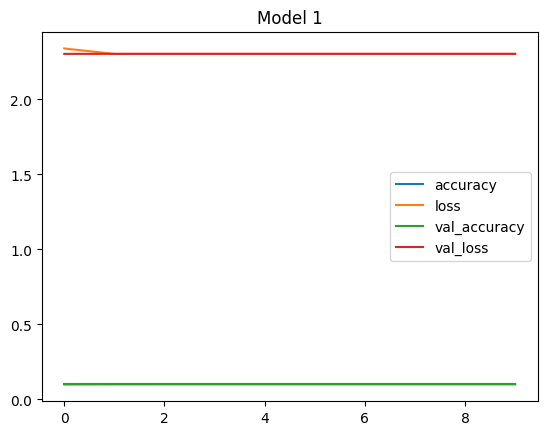

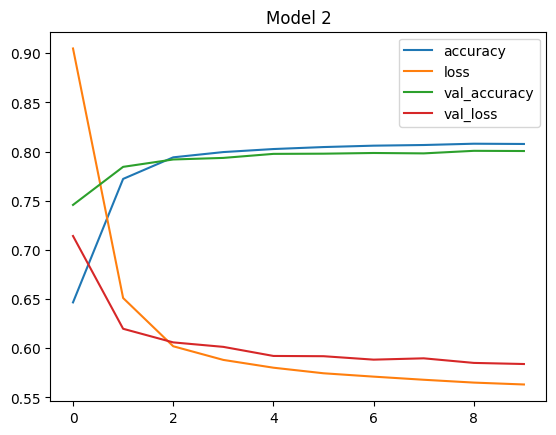

In [78]:
# Plotting loss curves
plt.figure(figsize=(6,5))
pd.DataFrame(non_norm_history.history).plot(title="Model 1")
pd.DataFrame(norm_history.history).plot(title="Model 2")
plt.show()

 > When comparing the results , the same model even **slightly** different data  can produce *dramitically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [79]:
 # set random seed
tf.random.set_seed(42)

# 1. Create a model
multiclass_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
multiclass_model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# 3. Create the learning rate callback
lr_scheduler =  tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# 4. Fit the model
new_history_1 = multiclass_model_3.fit(train_data_normalized,
                                       train_labels,
                                       epochs=40,
                                       validation_data=(test_data_normalized, test_labels),
                                       callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3140 - loss: 1.7363 - val_accuracy: 0.6181 - val_loss: 0.9567 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6638 - loss: 0.8701 - val_accuracy: 0.7471 - val_loss: 0.7072 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7660 - loss: 0.6553 - val_accuracy: 0.7676 - val_loss: 0.6492 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7879 - loss: 0.6015 - val_accuracy: 0.7854 - val_loss: 0.6146 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8018 - loss: 0.5727 - val_accuracy: 0.7934 - val_loss: 0.5949 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8091 - loss: 0.5553 - val_accuracy: 0.8012 - val_loss: 0.5818 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8114 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

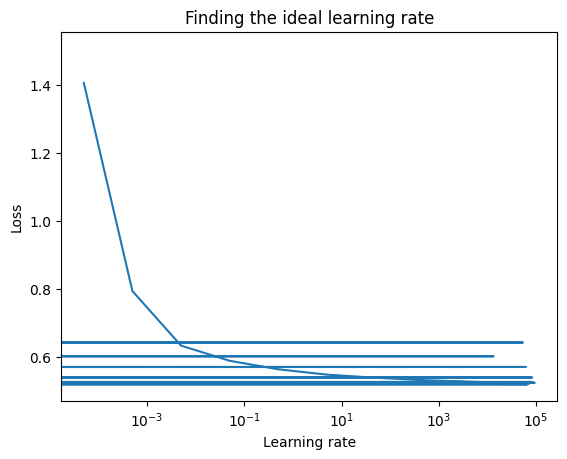

In [84]:
# Plot the learning rate
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**tf.range(40)/20)
plt.semilogx(lrs, new_history_1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [85]:
10**-3

0.001

In [87]:
# Let's refit a model with the ideal learning rate

# Setting the random seed
tf.random.set_seed(42)

# 1. Create a model
multiclass_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
multiclass_model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                           metrics=["accuracy"])

# 3. Fit the model
new_history_4 = multiclass_model_4.fit(train_data_normalized,
                                       train_labels,
                                       epochs=20,
                                       validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2457 - loss: 1.8731 - val_accuracy: 0.4167 - val_loss: 1.3938
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4231 - loss: 1.3695 - val_accuracy: 0.4395 - val_loss: 1.3230
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4386 - loss: 1.3127 - val_accuracy: 0.4731 - val_loss: 1.2904
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5017 - loss: 1.2436 - val_accuracy: 0.5732 - val_loss: 1.0971
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5683 - loss: 1.0627 - val_accuracy: 0.6030 - val_loss: 1.0059
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6109 - loss: 0.9818 - val_accuracy: 0.6471 - val_loss: 0.9445
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6526 - loss: 0.9292 - val_accuracy: 0.6785 - val_loss: 0.8958
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6950 - loss: 0.8335 -

## Evaluating our multiclass classification model

To our evaluate our multi-class multiclass classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix).
* Access some of its predictions (through visualizations).
* Improve its results (by training it for longer or changing the architecture).
* Save and export it for use in an application.


Let's go through the top 2...

In [108]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Oranges)
  fig.colorbar(cax)

  # Set labels to be classes
  if(classes):
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels= labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_normal[i,j]*100:.1f}%)" ,
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [90]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Anke boot']

In [94]:
# Make some prediction with our model
y_prob = multiclass_model_4.predict(test_data_normalized)

# View the first 5 predicitions
y_prob[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.33222966e-13, 0.00000000e+00, 2.62544925e-22, 1.24517816e-14,
        3.27834600e-16, 1.58062324e-01, 1.19083905e-14, 1.88817233e-01,
        1.93630694e-03, 6.51184082e-01],
       [1.01313265e-02, 7.55829427e-11, 5.91617346e-01, 1.99802482e-04,
        8.99894834e-02, 1.45467275e-04, 2.28973225e-01, 5.23913890e-09,
        7.89346844e-02, 8.67300787e-06],
       [6.86662534e-05, 9.71222103e-01, 6.71482470e-04, 1.11684781e-02,
        1.58469118e-02, 6.04981207e-04, 4.10120381e-04, 3.97729582e-06,
        3.13051783e-06, 2.42926404e-07],
       [6.86662534e-05, 9.71222103e-01, 6.71482470e-04, 1.11684781e-02,
        1.58469118e-02, 6.04981207e-04, 4.10120381e-04, 3.97729582e-06,
        3.13051783e-06, 2.42926404e-07],
       [1.14615254e-01, 1.08478198e-05, 3.08301598e-01, 3.32329907e-02,
        2.46827640e-02, 5.93229342e-05, 5.05602658e-01, 1.32257952e-07,
        1.34858461e-02, 8.57329178e-06]], dtype=float32)

**Note**: Remember to make prediciton on the same kind of data your model was trained on (e.g. if you model was trained on normalized data, you'll want to make predictions on normalized data).

In [97]:
y_prob[0], tf.argmax(y_prob[0]), class_name[tf.argmax(y_prob[0])]

(array([6.33222966e-13, 0.00000000e+00, 2.62544925e-22, 1.24517816e-14,
        3.27834600e-16, 1.58062324e-01, 1.19083905e-14, 1.88817233e-01,
        1.93630694e-03, 6.51184082e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [98]:
# Convert all of the prediction probabilites into integers
y_preds = y_prob.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [99]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [100]:
y_preds == test_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[702,   5,  15,  97,   7,   0, 166,   0,   8,   0],
       [  0, 958,   1,  27,  13,   0,   1,   0,   0,   0],
       [  6,   5, 546,  13, 307,   0, 122,   0,   1,   0],
       [ 13,  68,   7, 800,  67,   0,  41,   0,   4,   0],
       [  0,  40, 100,  20, 810,   0,  30,   0,   0,   0],
       [  0,   0,   0,   1,   0, 912,   0,  52,   8,  27],
       [107,   9, 309,  60, 160,   0, 347,   0,   8,   0],
       [  0,   0,   0,   0,   0,  44,   0, 918,   2,  36],
       [  3,   1,  35,   6,   9,  16,  23,   3, 903,   1],
       [  0,   0,   0,   0,   0,  25,   0,  57,   3, 915]])

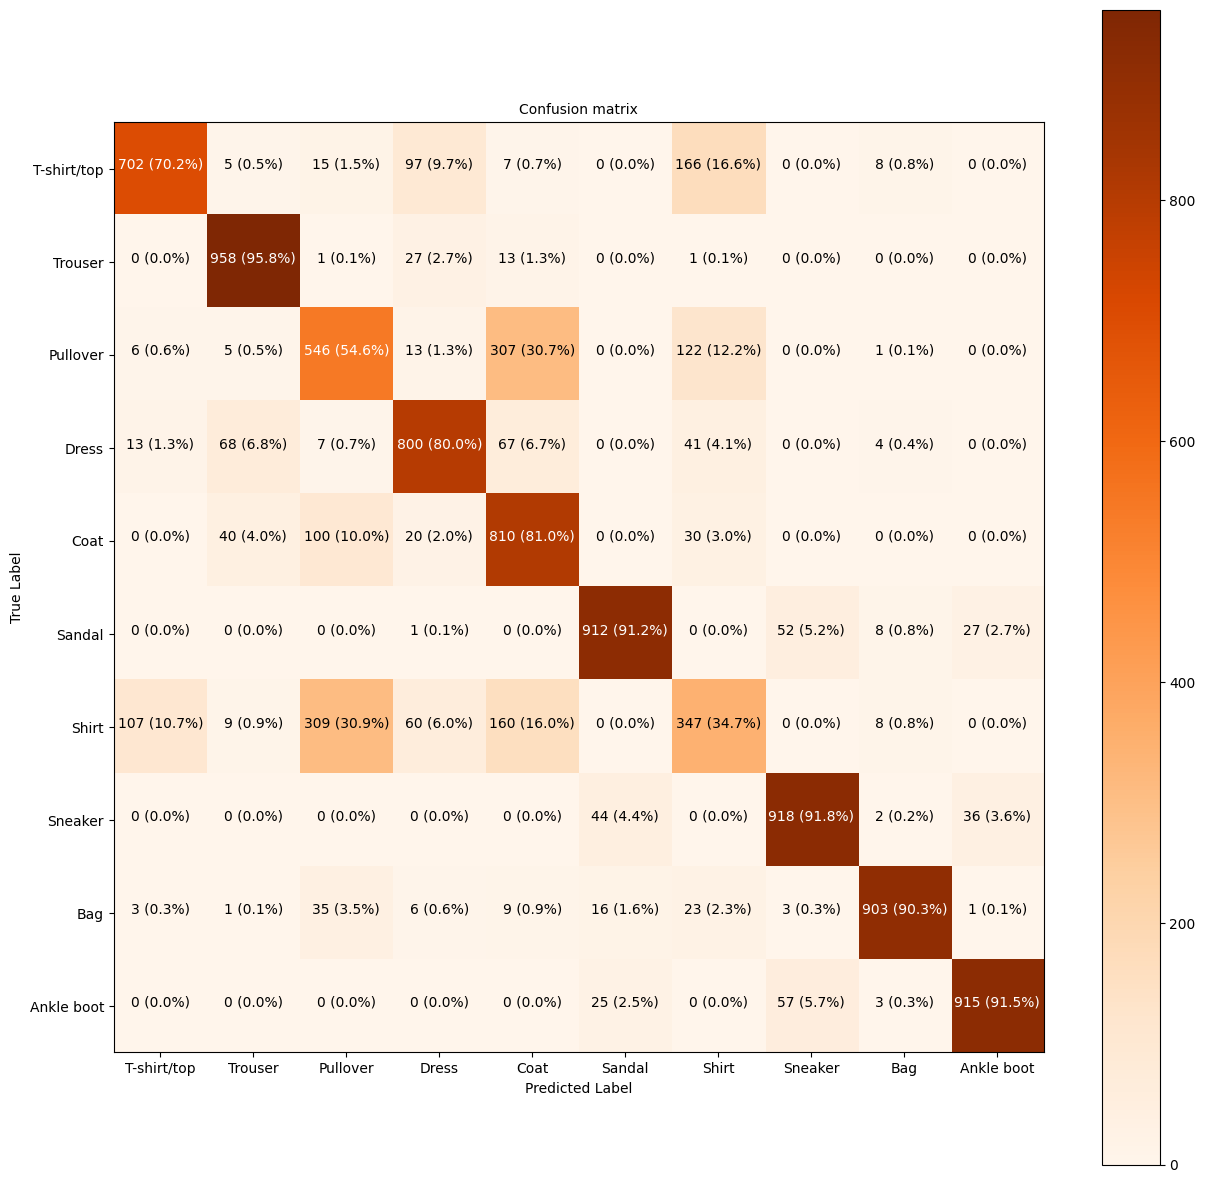

In [114]:
# Visualizing the confusion matrix
generate_confusion_matrix(y_true = test_labels,
                          y_pred = y_preds,
                          classes=class_name,
                          figsize=(15, 15),
                          text_size=10)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of our models.


Let's create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [140]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  rand = random.randint(0, len(images))

  # Create prediction and targets
  target_image = images[rand]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[rand]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.bone_r)

  # Change the color of title depending on if the prediciton is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Prediction: {} {:2.0f}% (True: {})".format(pred_label,
                                                         100*tf.reduce_max(pred_probs),
                                                         true_label,
                                                         color=color))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


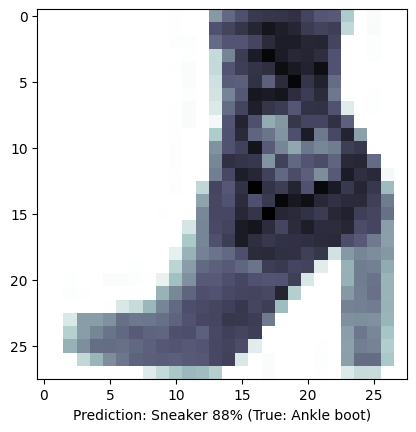

In [141]:
# Check our a random image as well as its predictions
plot_random_image(model = multiclass_model_4,
                  images = test_data_normalized,
                  true_labels=test_labels,
                  classes = class_name)